In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [2]:
# import dataset 
diabetes = pd.read_csv("diabetes.csv")
#diabetes
diabetes.head()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


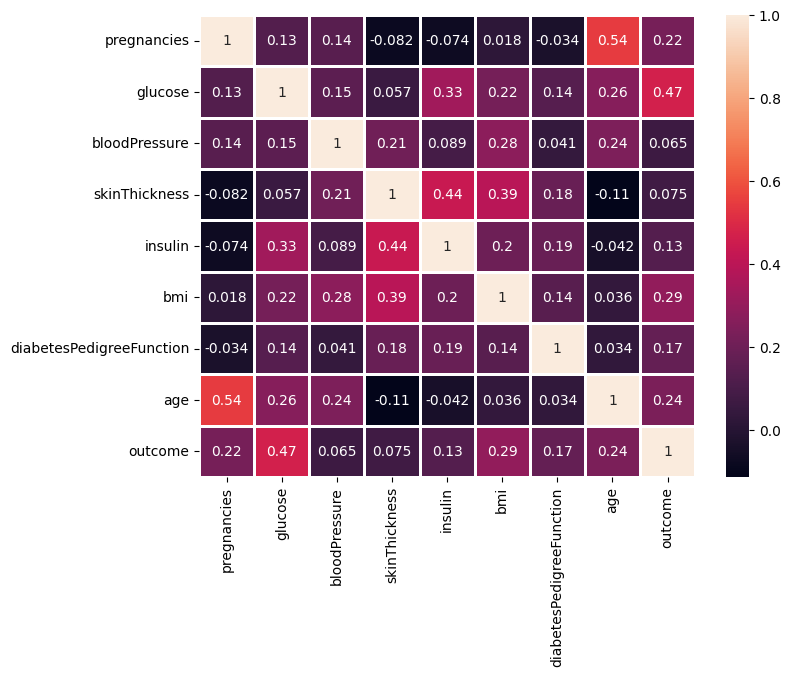

In [3]:
# Heat map correlation
plt.figure(figsize=(8,6))
#heat map code
sns.heatmap(diabetes.corr(), annot=True, linewidths=2)
plt.show()

In [4]:
# getting Over view of columns _> datatype 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodPressure             768 non-null    int64  
 3   skinThickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetesPedigreeFunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#summry  statistics 
diabetes.describe()


,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#replace Zero values with np.nan to visulize them 
zero_no_accepted = ['glucose','bloodPressure','skinThickness','insulin','bmi']
for col in zero_no_accepted:
    diabetes[col].replace(0, np.nan, inplace=True)

#check if Zero's has replaced or not
diabetes.head(10)

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


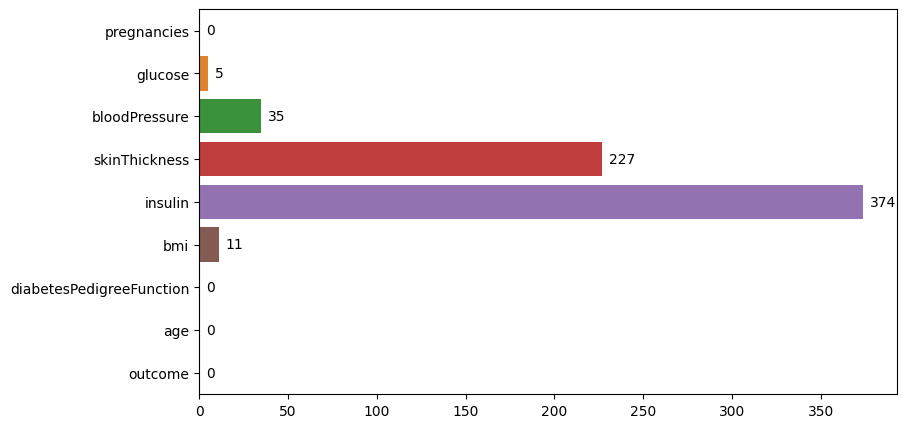

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [7]:
#Visulizing null values 
plt.figure(figsize=(9,5))
ax = sns.barplot(x=diabetes.isna().sum(),
    y=diabetes.columns, orient='h')

for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}",
               xy=(p.get_width(),p.get_y()+p.get_height()/2),
               xytext=(5,0), textcoords='offset points',
               ha='left', va='center',
               )
    
plt.grid(False)
plt.show()

#check if Zero's has replaced or not
diabetes.head(10)

In [8]:
#Implementation mean instead of null values 
for col in zero_no_accepted:
    diabetes[col].replace(np.nan, diabetes[col].mean(), inplace=True)

diabetes.head(10)

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [9]:
#Check if mean isreplaced null values or not
diabetes.describe()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 2000x2000 with 0 Axes>

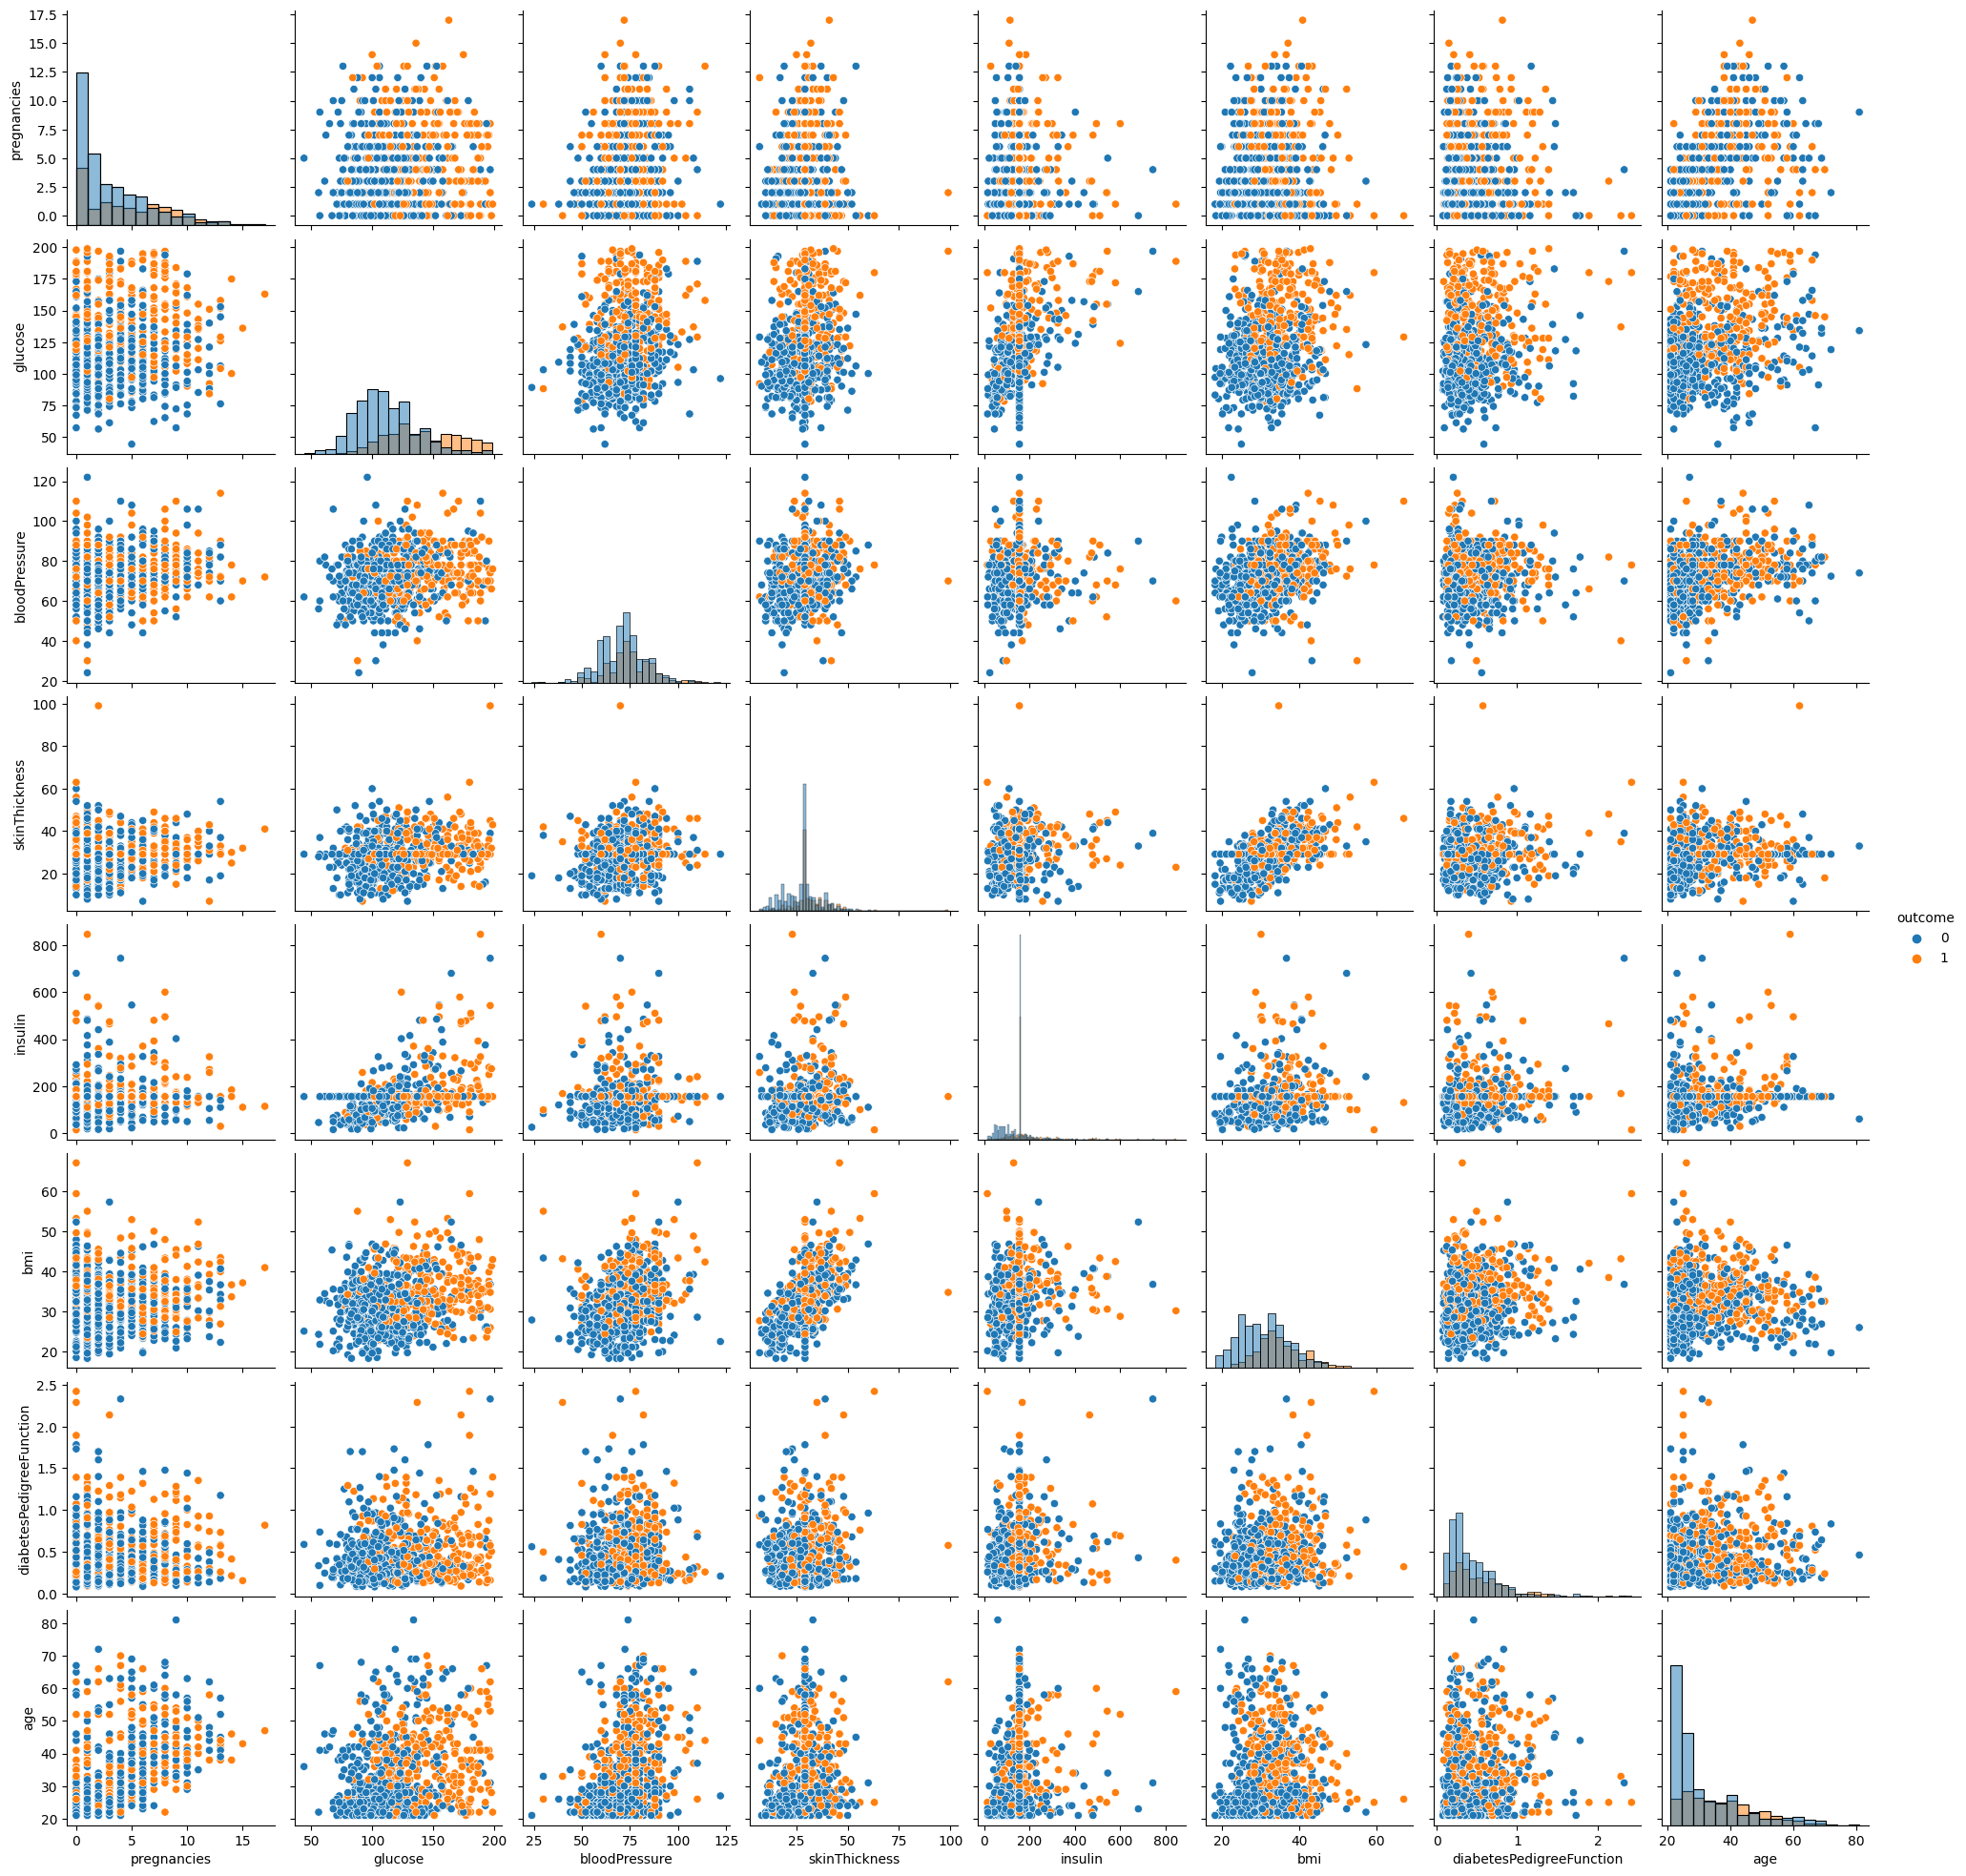

In [10]:
#pairwise relationship in data set (between attributes)
plt.figure(figsize=(20,20))
sns.pairplot(data=diabetes, hue='outcome',diag_kind='hist')
plt.show()

In [11]:
# how diabetes is yes or 2 and how is No or 0 
diabetes['Outcome'].value_counts()

KeyError: 'Outcome'

In [ ]:
diabetes.to_csv('diabetesProccessed.csv')


With the model installed, lets now go ahead and import the model and then create a new
instance of the model in which we specify the n_estimators parameter to have a value of 10000
